This code calculates the SSIM map for the simulated and experimental images 

In [1]:
# import libraries 

import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import torch
from diffusers import AutoencoderKL
from skimage.metrics import structural_similarity as ssim

from models.vae import encode_img,decode_img

from utils.preprocess import preprocess_simulation_output_data,preprocess_experimental_backgroundwhite_rawfiles
from utils.display import display_images_with_ssim_3rows
from utils.config import SIMULATED_FOLDER,EXPERIMENTAL_FOLDER


/hpc/dctrl/ks723/miniconda3/envs/pytorch_PA_patternprediction/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2025-10-22 13:56:32,395] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/hpc/dctrl/ks723/miniconda3/envs/pytorch_PA_patternprediction/lib/python3.10/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [2]:
"""
Display simulated patterns and their corresponding experimental patterns. 

"""
files_list  =['105_1.TIF','990_2.TIF','134_1.TIF','102_2.TIF','Fixed_19_1.TIF','20_1.TIF','Fixed_29_1.TIF','72_1.TIF','Fixed_4_2.TIF','Fixed_6_1.TIF']

sim_img_array=preprocess_simulation_output_data(SIMULATED_FOLDER,0,len(files_list),img_filenames=files_list)

Shape of image array: (10, 4, 32, 32)


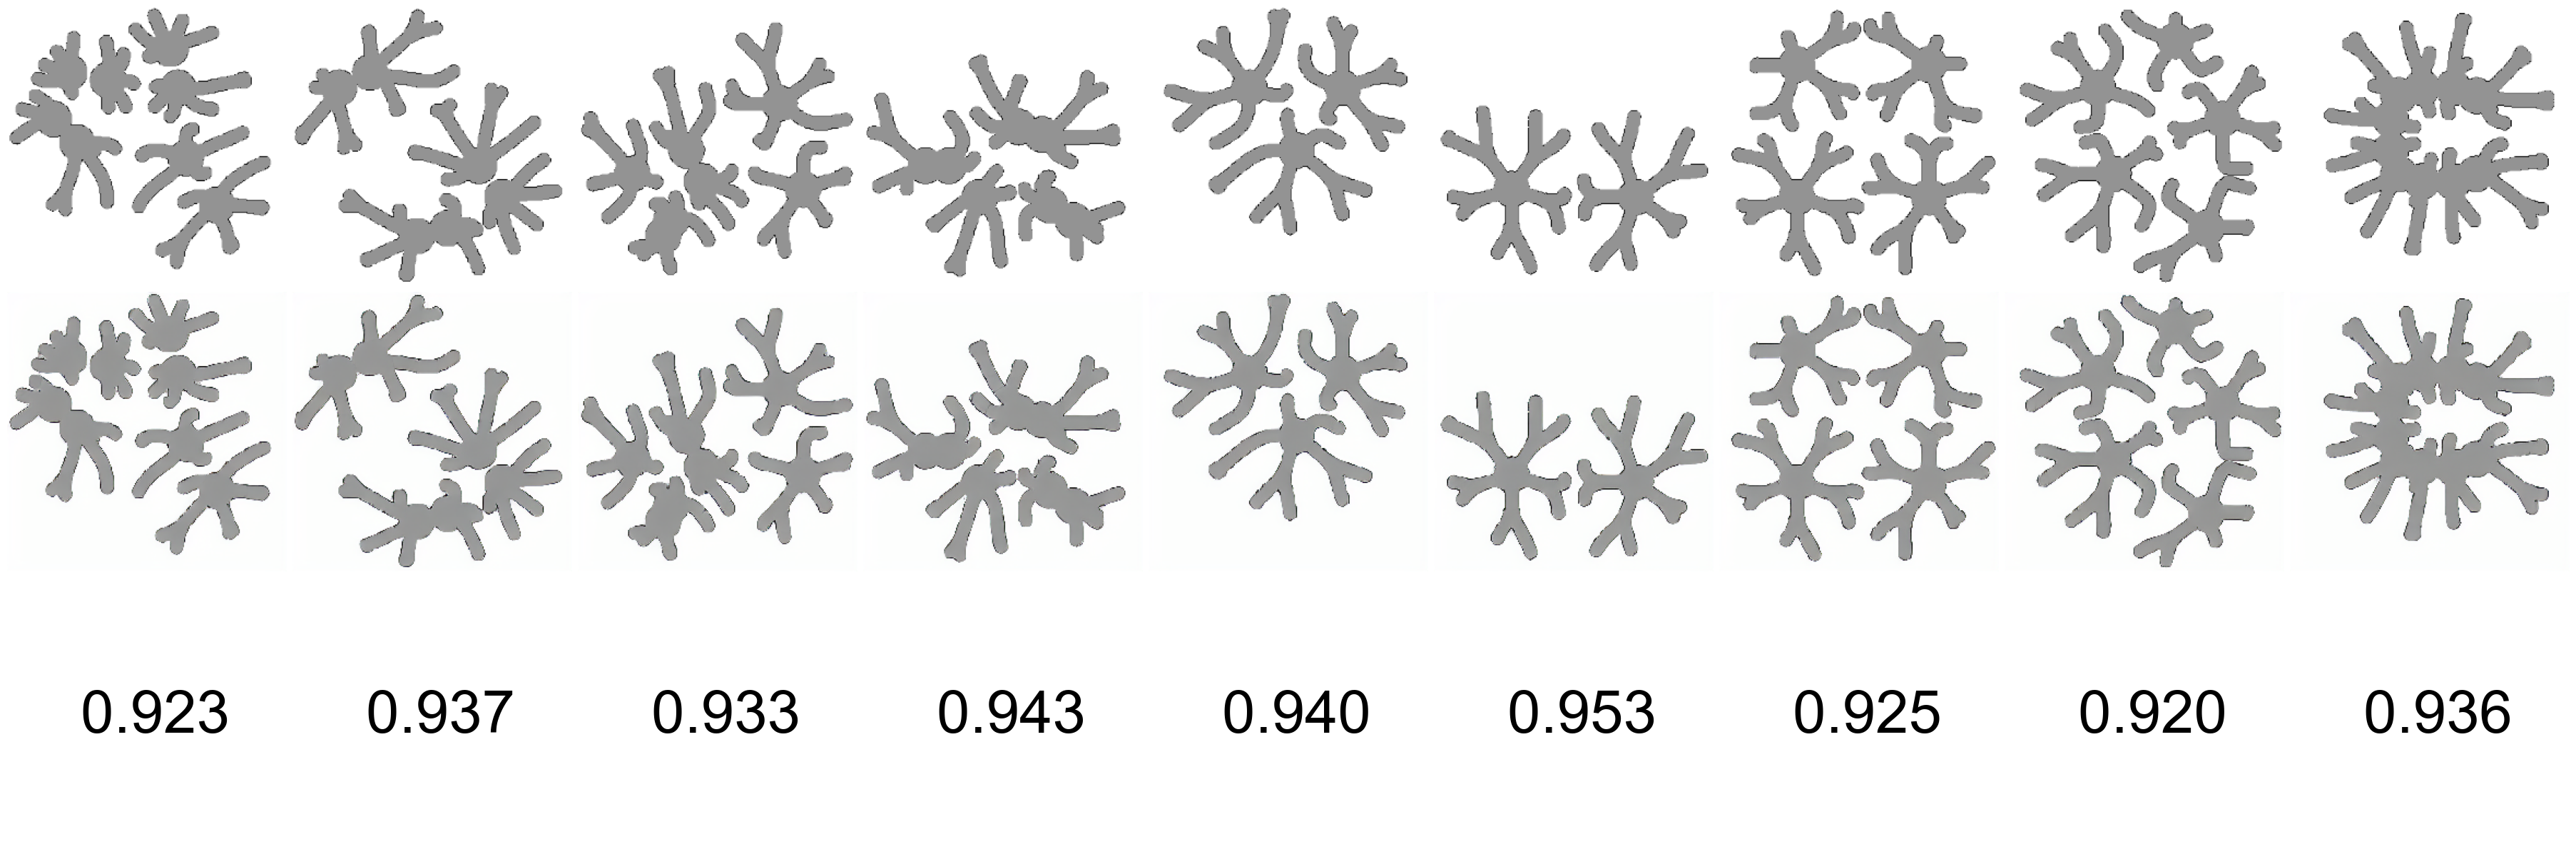

In [3]:
"""Load simulated images, preprocess involves resizing and converting to RGB format """

device="cuda" if torch.cuda.is_available() else "cpu"

foldername=SIMULATED_FOLDER

simulated_data=preprocess_simulation_output_data(SIMULATED_FOLDER,0,len(files_list),img_filenames=files_list)

X1=simulated_data
X1 = np.array(X1)
X1 = (np.array(X1).reshape(-1,1,256,256))  # Convert from (N, H, W, C) to (N, C, H, W)
X1 = X1 / 255.0  # Normalize the images

X = torch.Tensor(X1)

# Encode the images
encoded_latents = []

# encode latent of 100000 images

for img in range(0, X.shape[0]) :
    latent = encode_img(X[img,:,:,:])
    encoded_latents.append(latent.cpu())


# Simulating input image data as a list of random torch tensors
input_images_list=encoded_latents

# Convert the list of tensors to a numpy array
image_np = torch.cat(encoded_latents, dim=0).numpy()# Now final_image_array contains the processed images with the desired properties
print("Shape of image array:",image_np.shape)

yprime=image_np
yprime=torch.Tensor(yprime)

reconstructed_images=decode_img(yprime.to(device))

display_images_with_ssim_3rows(X[0:9], reconstructed_images[0:9], num_samples=9)


Shape of image array: (10, 4, 32, 32)


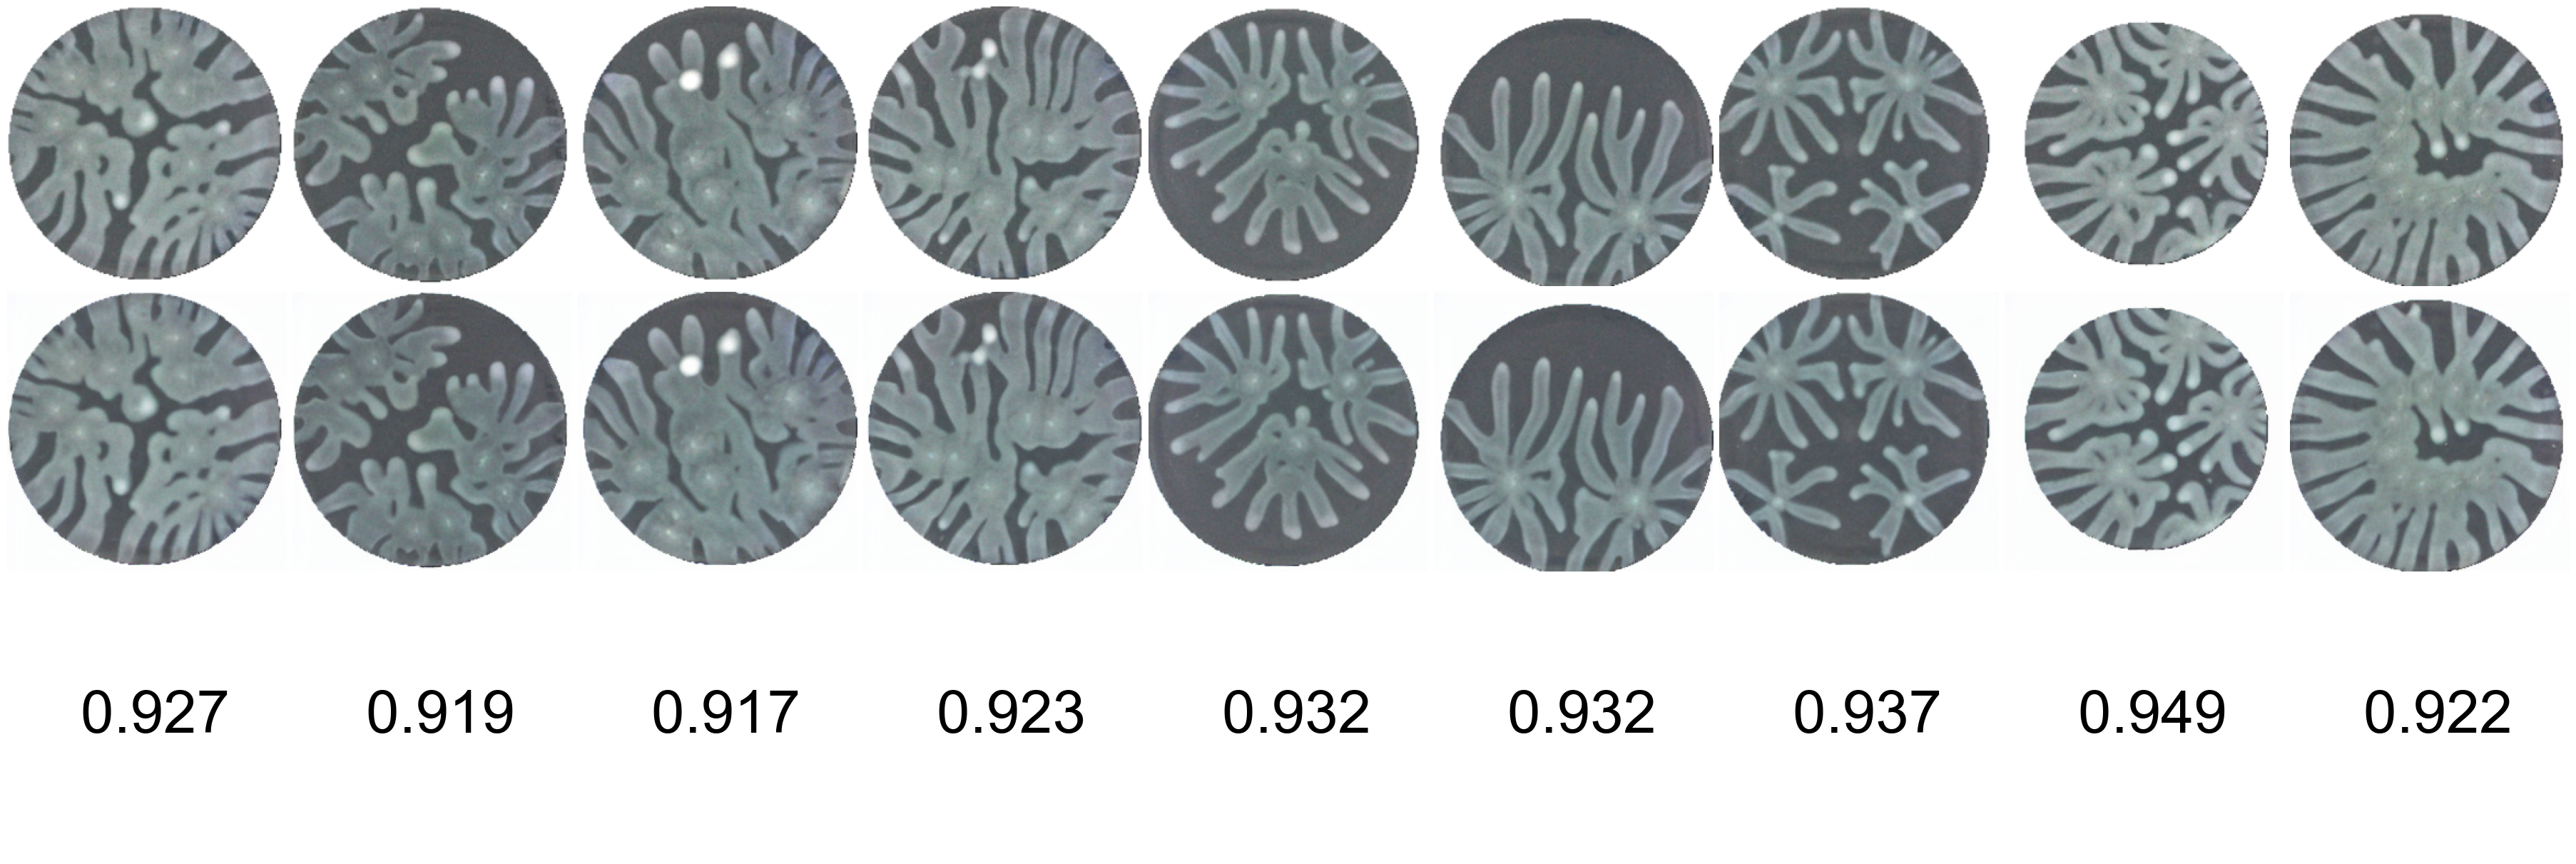

In [4]:
"""Load experimental images, preprocess involves cropping plate and adjusting contrast """

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")



experimental_data=preprocess_experimental_backgroundwhite_rawfiles(EXPERIMENTAL_FOLDER,0,len(files_list),img_filenames=files_list)

X1=experimental_data
X1 = np.array(X1)
X1 = np.transpose(X1, (0, 3, 1, 2)) / 255.0  # Normalize and reorder

X = torch.Tensor(X1)

# Encode the images
encoded_latents = []

# encode latent of 100000 images

for img in range(0, X.shape[0]) :
    latent = encode_img(X[img,:,:,:])
    encoded_latents.append(latent.cpu())


# Simulating input image data as a list of random torch tensors
input_images_list=encoded_latents

# Convert the list of tensors to a numpy array
image_np = torch.cat(encoded_latents, dim=0).numpy()# Now final_image_array contains the processed images with the desired properties
print("Shape of image array:",image_np.shape)

yprime=image_np
yprime=torch.Tensor(yprime)

reconstructed_images=decode_img(yprime.to(device))

display_images_with_ssim_3rows(X[0:9], reconstructed_images[0:9], num_samples=9)